In [1]:
"""
Import all the required libraries.
"""
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from lifelines import KaplanMeierFitter 
from lifelines.plotting import plot_lifetimes
from lifelines import CoxPHFitter  


"""
Future wwork:
Testing the survival difference at a specific point in time could be included to see if the difference is statistically significant. 
----------------
from lifelines.statistics import (logrank_test, 
                                  pairwise_logrank_test, 
                                  multivariate_logrank_test, 
                                  survival_difference_at_fixed_point_in_time_test)
"""

'\nFuture wwork:\nTesting the survival difference at a specific point in time could be included to see if the difference is statistically significant. \n----------------\nfrom lifelines.statistics import (logrank_test, \n                                  pairwise_logrank_test, \n                                  multivariate_logrank_test, \n                                  survival_difference_at_fixed_point_in_time_test)\n'

In [2]:
# Load the dataset.
# Create a dataframe.
df_churn = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
# Have a quick look at the dataset.
df_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Check the data types and structures.
# 7043 rows, 21 columns with 19 features.
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   float64
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
#Check the data stats.
df_churn.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
# Check null information.
df_churn.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
# Impute this missing values with zero for the TotalCharges column.
df_churn['TotalCharges'] = df_churn['TotalCharges'].replace(" ", 0).astype('float32')

Text(0.5, 1.0, 'Churn Histogram')

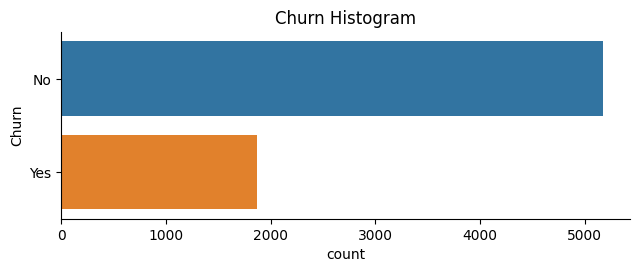

In [8]:
# Plot the target variable.
churn_histogram= sns.catplot(y="Churn", kind="count", data=df_churn, height=2.6, aspect=2.5, orient='h')
plt.title("Churn Histogram")

In [9]:
# Save the plot.
churn_histogram.savefig('churn_histogram.png')

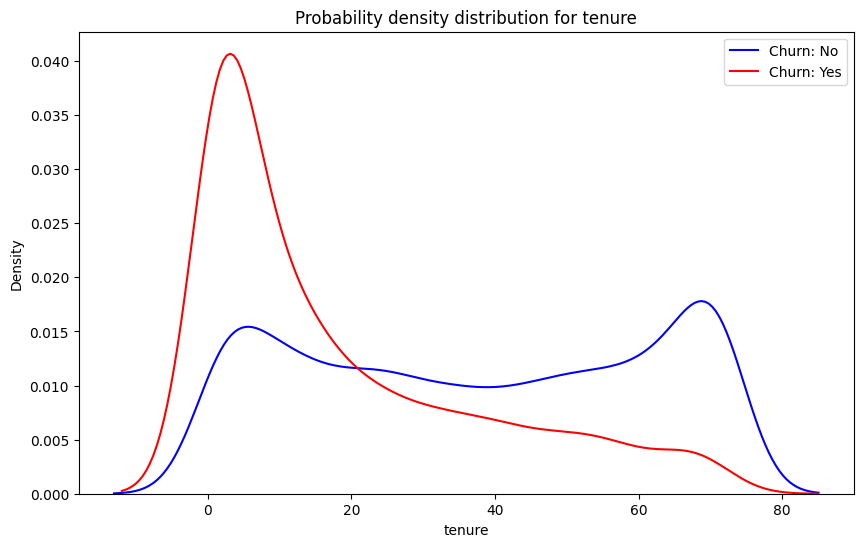

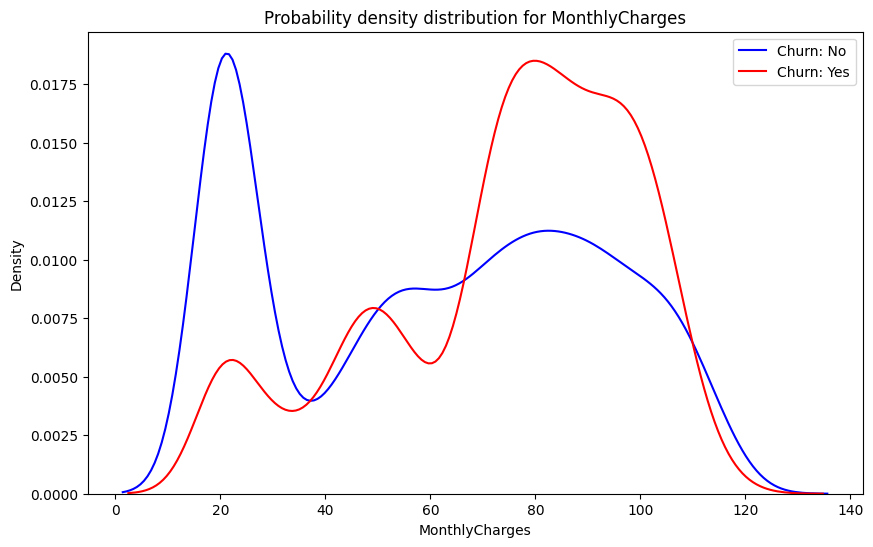

In [10]:
"""
This dataset has 3 continuous features:
The continuous features are tenure, monthly charges and total charges. 
The amount in total charges column is proportional to tenure (months) multiplied by monthly charges. 
Thus, it is unnecessary to include total charges in the model.
------------
Explore the numerical features,such as tenure and monthly charges.
Estimate the probability density distribution.
Figure out whether customers are more likely to churn as the tenure increases.
Check out whether customers are more likely to churn as the monthly charges increases.
"""
def kdeplot(feature):
    plt.figure(figsize=(10, 6))
    plt.title("Probability density distribution for {}".format(feature))
    ax0 = sns.kdeplot(df_churn[df_churn['Churn'] == 'No'][feature].dropna(), color= 'blue', label= 'Churn: No', legend=True)
    ax1 = sns.kdeplot(df_churn[df_churn['Churn'] == 'Yes'][feature].dropna(), color= 'red', label= 'Churn: Yes',legend=True)
    plt.legend()
    plt.savefig("{}_pdf.png".format(feature))
tenure_pdf=kdeplot('tenure')
MonthlyCharges_pdf=kdeplot('MonthlyCharges')

#People who have been a customer for a long time tend to stay with the company.
#Customers with higher MonthlyCharges are more probable to churn.

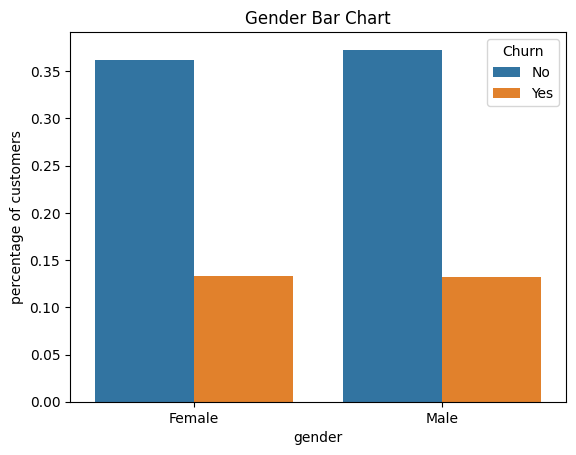

In [11]:
"""
This dataset has 16 categorical features:
------------
6 binary features with two unique values
9 features with three unique values
1 feature with four unique values
------------
Let's first check binary categorical features in terms of churn rate.
Take gender column as an example.
Let's see if churn rate is different for males and females.
"""
axis_y = "percentage of customers"
gp_gender = df_churn.groupby('gender')["Churn"].value_counts()/len(df_churn)
gp_gender = gp_gender.to_frame().rename({"Churn": axis_y}, axis=1).reset_index()
ax = sns.barplot(x='gender', y= axis_y, hue='Churn', data=gp_gender)
plt.title("Gender Bar Chart")
plt.savefig('gender_bar_graph.png')

#Average churn rate for males and females are approximately the same.
#Gender is not a good indicative of churn rate.

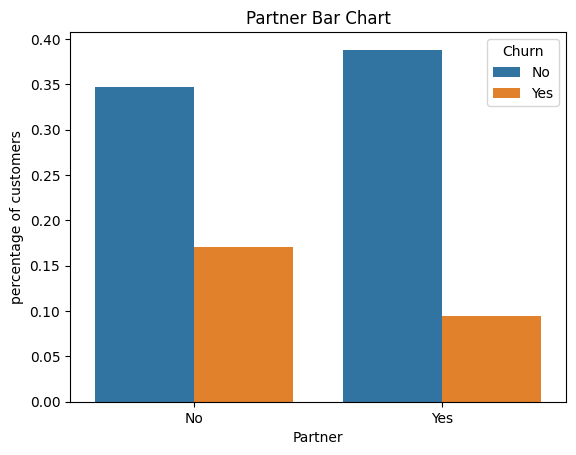

In [12]:
"""
From the plots above we can conclude that:
Gender is not an indicative of churn.
-----------
Let's check another binary categorical features in terms of churn rate.
Take Partner column as an example.
Let's see if customers that doesn't have partners are more likely to churn.
"""
axis_y = "percentage of customers"
gp_Partner = df_churn.groupby('Partner')["Churn"].value_counts()/len(df_churn)
gp_Partner = gp_Partner.to_frame().rename({"Churn": axis_y}, axis=1).reset_index()
ax = sns.barplot(x='Partner', y= axis_y, hue='Churn', data=gp_Partner)
plt.title("Partner Bar Chart")
plt.savefig('Partner_bar_graph.png')

# Customers that doesn't have partners are more likely to churn.

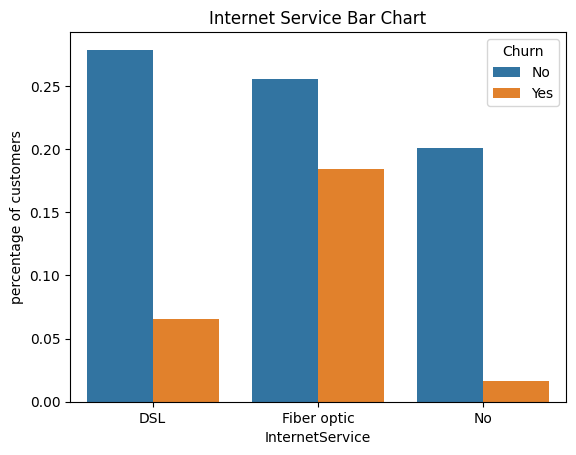

In [13]:
"""
Let's check features with three unique values in terms of churn rate.
Take InternetService column as an example.
"""
axis_y = "percentage of customers"
gp_InternetService = df_churn.groupby('InternetService')["Churn"].value_counts()/len(df_churn)
gp_InternetService = gp_InternetService.to_frame().rename({"Churn": axis_y}, axis=1).reset_index()
ax = sns.barplot(x='InternetService', y= axis_y, hue='Churn', data=gp_InternetService)
plt.title("Internet Service Bar Chart")
plt.savefig('InternetService_bar_graph.png')

# Customers without internet are less likely to churn.
# Customers with fiber have a higher churn rate than those with DSL connection.

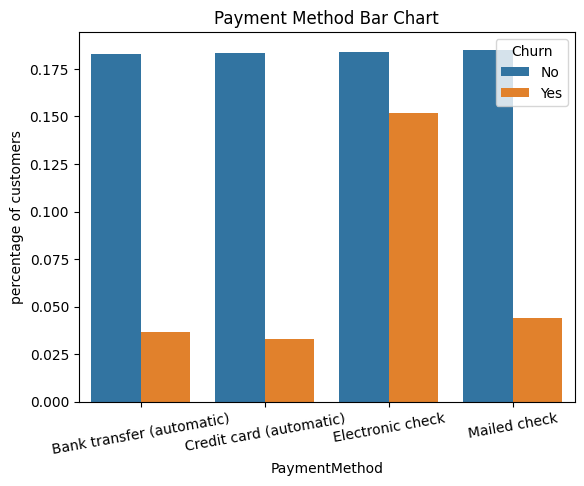

In [14]:
"""
Let's check features with four unique values in terms of churn rate.
Take PaymentMethod column as an example.
"""
axis_y = "percentage of customers"
gp_PaymentMethod = df_churn.groupby('PaymentMethod')["Churn"].value_counts()/len(df_churn)
gp_PaymentMethod = gp_PaymentMethod.to_frame().rename({"Churn": axis_y}, axis=1).reset_index()
ax = sns.barplot(x='PaymentMethod', y= axis_y, hue='Churn', data=gp_PaymentMethod)
plt.xticks(rotation = 10)
plt.title("Payment Method Bar Chart")
plt.savefig('PaymentMethod_bar_graph.png')

# Customers with Electronic check has a very high churn rate.

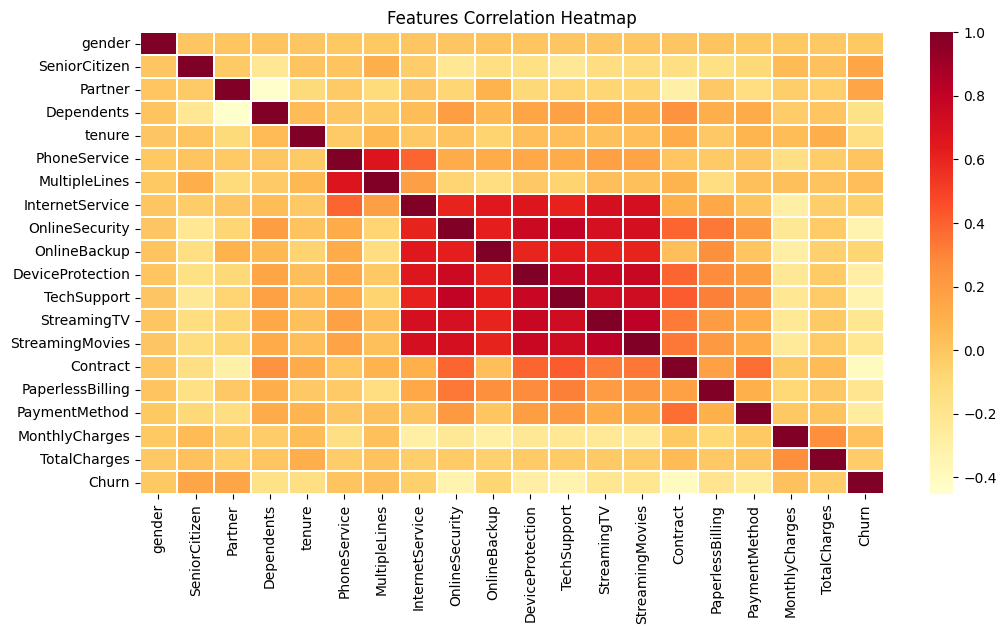

In [15]:
#Check out correlation between features using correlation heatmap (Pearson method).
plt.figure(figsize=(12, 6))
df_churn_corr=df_churn.drop(columns=['customerID'])
corr = df_churn_corr.apply(lambda x: pd.factorize(x)[0]).corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
                 linewidths=.2, cmap="YlOrRd")
plt.title("Features Correlation Heatmap")
plt.savefig('Features_Correlation_Heatmap.png')

In [16]:
# Prepare the data
# Replace yes and No in the Churn column to 1 and 0. 1 for the event and 0 for the censured data.
df_churn['Churn']=df_churn['Churn'].apply(lambda x: 1 if x == 'Yes' else 0 )

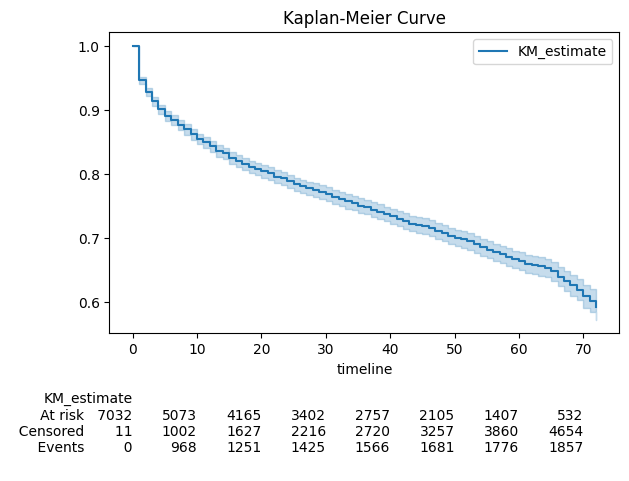

In [17]:
# Create a general Kaplan-Meier curve without breaking it into groups of covariates.
# Display information about the number of observations at risk at certain points of time.

T = df_churn["tenure"]
E = df_churn["Churn"]

kmf = KaplanMeierFitter()
kmf.fit(T, event_observed=E)

kmf.plot(at_risk_counts=True)
plt.title("Kaplan-Meier Curve")
plt.savefig('Kaplan-Meier_Curve.png')

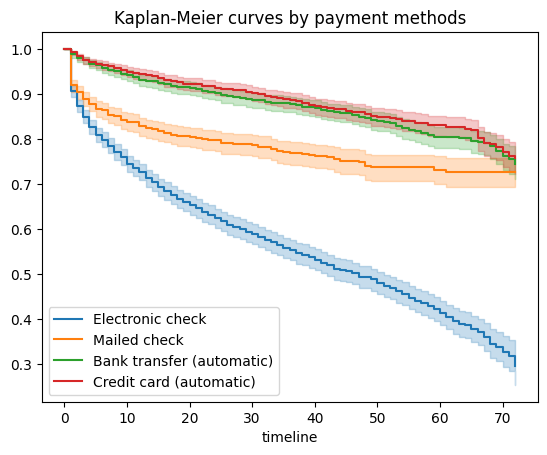

In [18]:
# Get more insight into behaviour per subset of the population (= level of a categorical feature)
# Create Kaplan-Meier curves for Cohorts
# Compare the survival function between cohorts 
# Take payment method as an example
ax = plt.subplot(111)

kmf = KaplanMeierFitter()

for payment_method in df_churn["PaymentMethod"].unique():
    
    flag = df_churn["PaymentMethod"] == payment_method
    
    kmf.fit(T[flag], event_observed=E[flag], label=payment_method)
    kmf.plot(ax=ax)

plt.title("Kaplan-Meier curves by payment methods")
plt.savefig('Kaplan-Meier_Curve_payment_methods.png')

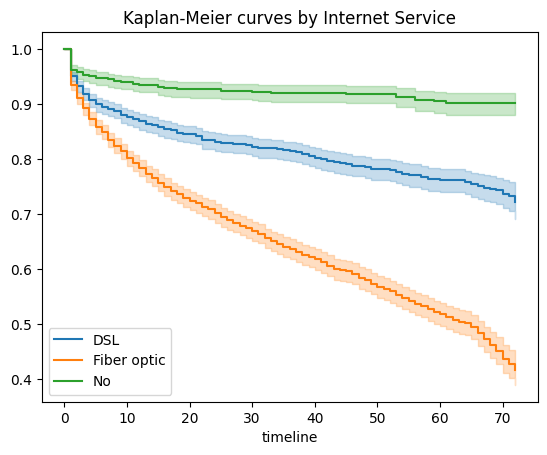

In [19]:
# Get more insight into behaviour per subset of the population (= level of a categorical feature)
# Create Kaplan-Meier curves for Cohorts
# Compare the survival function between cohorts 
# Take Internet Service as another example
ax = plt.subplot(111)

kmf = KaplanMeierFitter()

for Internet_Service in df_churn["InternetService"].unique():
    
    flag = df_churn["InternetService"] == Internet_Service
    
    kmf.fit(T[flag], event_observed=E[flag], label=Internet_Service)
    kmf.plot(ax=ax)

plt.title("Kaplan-Meier curves by Internet Service")
plt.savefig('Kaplan-Meier_Curve_Internet_Service.png')

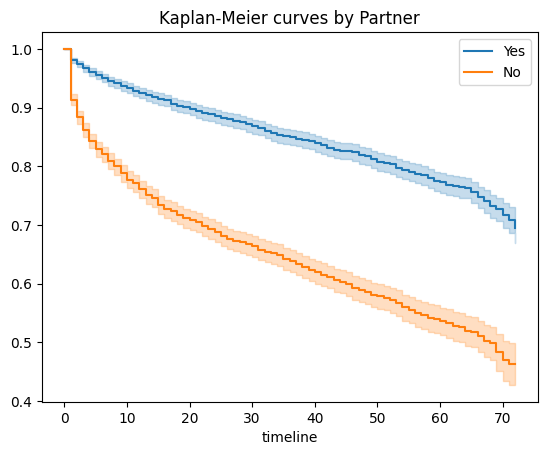

In [20]:
# Get more insight into behaviour per subset of the population (= level of a categorical feature)
# Create Kaplan-Meier curves for Cohorts
# Compare the survival function between cohorts 
# Take Partner as another example
ax = plt.subplot(111)

kmf = KaplanMeierFitter()

for P in df_churn["Partner"].unique():
    
    flag = df_churn["Partner"] == P
    
    kmf.fit(T[flag], event_observed=E[flag], label=P)
    kmf.plot(ax=ax)

plt.title("Kaplan-Meier curves by Partner")
plt.savefig('Kaplan-Meier_Curve_Partner.png')

In [21]:
# Kaplan-Meier curves are useful when the predictor variable is categorical.
# Cox proportional hazards regression analysis works for both quantitative variables and categorical variables. 
# Let's use the the subset of the columns to show how cox proportional hazards regression analysis works
df_churn_reg= df_churn.loc[:,['tenure','Churn','gender','Partner','InternetService','MonthlyCharges']]

In [22]:
# Have a look at the data subset to train the model.
df_churn_reg.head()

,tenure,Churn,gender,Partner,InternetService,MonthlyCharges
0,1.0,0,Female,Yes,DSL,29.85
1,34.0,0,Male,No,DSL,56.95
2,2.0,1,Male,No,DSL,53.85
3,45.0,0,Male,No,DSL,42.30
4,2.0,1,Female,No,Fiber optic,70.70


In [23]:
# Create dummy variables by using one-hot encoding
# Drop redundant columns
df_churn_reg_dummy = pd.get_dummies(df_churn_reg, drop_first=True)

In [24]:
df_churn_reg_dummy.head()

,tenure,Churn,MonthlyCharges,gender_Male,Partner_Yes,InternetService_Fiber optic,InternetService_No
0,1.0,0,29.85,0,1,0,0
1,34.0,0,56.95,1,0,0,0
2,2.0,1,53.85,1,0,0,0
3,45.0,0,42.30,1,0,0,0
4,2.0,1,70.70,0,0,1,0


<lifelines.CoxPHFitter: fitted with 7043 total observations, 5174 right-censored observations>
             duration col = 'tenure'
                event col = 'Churn'
      baseline estimation = breslow
   number of observations = 7043
number of events observed = 1869
   partial log-likelihood = -14785.89
         time fit was run = 2022-12-04 15:42:37 UTC

---
                              coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                           
MonthlyCharges               -0.05       0.95       0.00            -0.06            -0.05                 0.95                 0.95
gender_Male                  -0.05       0.95       0.05            -0.14             0.04                 0.87                 1.04
Partner_Yes                  -0.78       0.46       0.05            -0.88            -0.68                 0.42                 0.51
InternetService_Fiber optic   2.69      14.66       0.09             2.50             2.87                12.22                17.59
InternetService_No           -2.68       0.07       0.12            -2.91            -2.44                 0.05                 0.09

                              cmp to      z      p   -log2(p)
covariate                                                    
MonthlyCharges                  0.00 -26.88 <0.005     526.19
gender_Male                     0.00  -1.17   0.24       2.04
Partner_Yes                     0.00 -15.54 <0.005     178.48
InternetService_Fiber optic     0.00  28.93 <0.005     609.04
InternetService_No              0.00 -22.49 <0.005     369.58
---
Concordance = 0.77
Partial AIC = 29581.78
log-likelihood ratio test = 1734.30 on 5 df
-log2(p) of ll-ratio test = inf

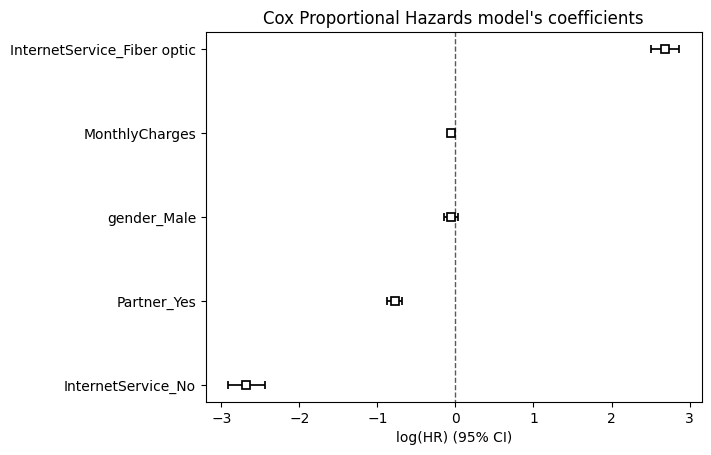

In [25]:
# Develop a Cox Proportional Hazards model
cph = CoxPHFitter()
cph.fit(df_churn_reg_dummy, 'tenure', event_col='Churn')
# Examine the significance of the features
cph.print_summary() 
cph.plot()
plt.title("Cox Proportional Hazards model's coefficients")
plt.savefig('Cox_Proportional_Hazards_coefficients.png')

# InternetService_Fiber optic has a coefficient of about 2.69.
# Thus, one unit increase in InternetService_Fiber optic means the the baseline hazard will increase by a factor of exp(2.69)= 14.66.
# A higher hazard means more at risk of the events occurring.

In [26]:
# Selecte 5 customers for predition in order to create a tailor made strategy for high-valued customers for different survival risk segments along the timeline.

df_churn_selected_customer=df_churn_reg_dummy.iloc[1:6]
df_churn_selected_customer

,tenure,Churn,MonthlyCharges,gender_Male,Partner_Yes,InternetService_Fiber optic,InternetService_No
1,34.0,0,56.95,1,0,0,0
2,2.0,1,53.85,1,0,0,0
3,45.0,0,42.30,1,0,0,0
4,2.0,1,70.70,0,0,1,0
5,8.0,1,99.65,0,0,1,0


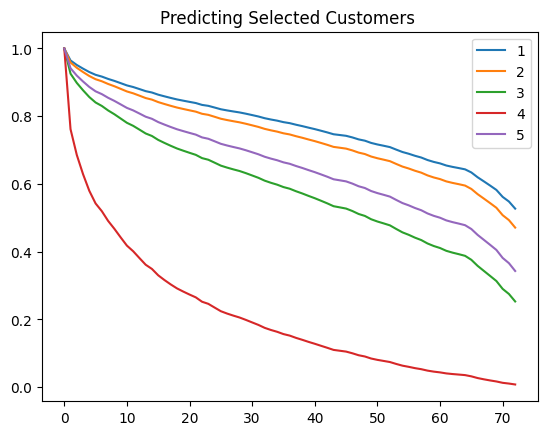

In [27]:
# Predict the survival curve for the selected customers. 
cph.predict_survival_function(df_churn_selected_customer).plot()
plt.title("Predicting Selected Customers ")
plt.savefig('Predicting_Selected_Customers.png')


# From the above graph,we can conclude that customer 4 has the highest probability to churn.